In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [2]:
# Define connection parameters
host = '127.0.0.1'
port = '5432'  # default PostgreSQL port 
database = 'project3'
user = 'postgres'
password = 'postgres'

# Create the connection string
connection_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'

# Create the database engine
engine = create_engine(connection_string)

In [3]:
# Define SQL query for full table
query = 'SELECT * FROM flight_data'
# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)
# Display the DataFrame
df.head()

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,1,12,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2,12,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,3,12,Endeavor Air Inc.,AGS,"Augusta, GA",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,4,12,Endeavor Air Inc.,ALB,"Albany, NY",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,5,12,Endeavor Air Inc.,ATL,"Atlanta, GA",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [6]:
# Define SQL query for airports
query = 'SELECT DISTINCT airport, SUM(weather_ct) FROM flight_data GROUP BY flight_data.airport ORDER BY sum DESC'
# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)
# Display the DataFrame
df.head()

,airport,sum
0,DFW,3277.44
1,DEN,2297.23
2,ATL,2196.69
3,ORD,2042.29
4,CLT,1661.55


In [7]:
# Define SQL query for cities
query = 'SELECT DISTINCT airport, city, SUM(total_arrivals) AS Total_Arrivals, SUM(total_delays_ct) AS total_delays, SUM(carrier_ct) AS carrier_delays, SUM(weather_ct) AS weather_delays, SUM(nat_air_sys_ct) AS nat_air_sys_delays, SUM(late_aircraft_ct) AS late_aircraft_delays FROM flight_data GROUP BY flight_data.city, flight_data.airport'
# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)
# Display the DataFrame
df

,airport,city,total_arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays
0,OAJ,"Jacksonville/Camp Lejeune, NC",2435.0,316.0,122.35,21.28,71.15,101.07
1,CPR,"Casper, WY",2012.0,423.0,218.87,23.14,26.08,153.91
2,ALW,"Walla Walla, WA",481.0,47.0,21.99,4.89,3.22,16.90
3,LAS,"Las Vegas, NV",191794.0,48933.0,12680.53,865.74,16866.96,18353.63
4,WYS,"West Yellowstone, MT",294.0,26.0,19.00,6.00,0.00,1.00
...,...,...,...,...,...,...,...,...
354,CDV,"Cordova, AK",724.0,136.0,21.55,8.20,39.36,66.80
355,EUG,"Eugene, OR",8664.0,1435.0,535.91,64.03,243.73,589.41
356,ELP,"El Paso, TX",19361.0,4287.0,1553.65,89.09,611.21,2022.43
357,MSY,"New Orleans, LA",50129.0,11317.0,4081.36,293.54,2398.47,4506.04


# REGIONS

## Northeast

States included in Northeast US: Connecticut, Delaware, District of Columbia, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, pennsylvania, puerto Rico, Rhode Island, Vermont, Virgin Islands, Virginia and West Virginia

Source: https://www.dol.gov/agencies/whd/programs/dbra/neast#:~:text=States%20included%20in%20the%20Northeast,Islands%2C%20Virginia%20and%20West%20Virginia.

In [8]:
from sqlalchemy import text

# Define the SQL query
query = '''
SELECT DISTINCT airport, city, 
    SUM(total_arrivals) AS Total_Arrivals, 
    SUM(total_delays_ct) AS total_delays, 
    SUM(carrier_ct) AS carrier_delays, 
    SUM(weather_ct) AS weather_delays, 
    SUM(nat_air_sys_ct) AS nat_air_sys_delays, 
    SUM(late_aircraft_ct) AS late_aircraft_delays,
    month
FROM flight_data 
WHERE city LIKE '%CT%' OR city LIKE '%DE%' OR city LIKE '%DC%' OR city LIKE '%ME%' OR city LIKE '%MD%' OR city LIKE '%MA%' OR city LIKE '%NH%' OR city LIKE '%NJ%' OR city LIKE '%NY%' OR city LIKE '%PA%' OR city LIKE '%PR%' OR city LIKE '%RI%' OR city LIKE '%VT%' OR city LIKE '%VI%' OR city LIKE '%VA%' OR city LIKE '%WV%'
GROUP BY city, airport, month
'''

# Create a connection from the Engine
conn = engine.connect()

# Execute the query and fetch the result as a list of tuples
result = conn.execute(text(query)).fetchall()

# Convert the result into a list of dictionaries
result_dicts = []
for row in result:
    result_dict = {
        'airport': row[0],
        'city': row[1],
        'Total_Arrivals': row[2],
        'total_delays': row[3],
        'carrier_delays': row[4],
        'weather_delays': row[5],
        'nat_air_sys_delays': row[6],
        'late_aircraft_delays': row[7],
        'month': row[8]
    }
    result_dicts.append(result_dict)

# Close the connection
conn.close()

# Create a Pandas DataFrame from the list of dictionaries
northEast = pd.DataFrame(result_dicts)

# Display the DataFrame
northEast

,airport,city,Total_Arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays,month
0,LYH,"Lynchburg, VA",152.0,22.0,5.71,3.55,3.79,8.81,7
1,ABE,"Allentown/Bethlehem/Easton, PA",398.0,89.0,29.68,9.47,15.49,34.36,8
2,ORH,"Worcester, MA",145.0,40.0,12.96,1.86,10.88,14.29,4
3,PVD,"Providence, RI",1453.0,279.0,116.18,6.73,42.10,112.99,3
4,TTN,"Trenton, NJ",188.0,94.0,27.16,5.24,15.58,46.02,7
...,...,...,...,...,...,...,...,...,...
684,TTN,"Trenton, NJ",182.0,58.0,15.34,0.16,6.08,36.41,5
685,HGR,"Hagerstown, MD",17.0,0.0,0.00,0.00,0.00,0.00,4
686,JFK,"New York, NY",12166.0,2931.0,964.81,71.33,847.32,1039.14,3
687,PBG,"Plattsburgh, NY",40.0,13.0,4.61,3.66,4.48,0.24,7


## Southeast
States included in the Southeast Region:
Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina and Tennessee.

Source: https://www.dol.gov/agencies/whd/programs/dbra/seast

In [9]:
# Define the SQL query
query = '''
SELECT DISTINCT airport, city, 
    SUM(total_arrivals) AS Total_Arrivals, 
    SUM(total_delays_ct) AS total_delays, 
    SUM(carrier_ct) AS carrier_delays, 
    SUM(weather_ct) AS weather_delays, 
    SUM(nat_air_sys_ct) AS nat_air_sys_delays, 
    SUM(late_aircraft_ct) AS late_aircraft_delays,
    month
FROM flight_data 
WHERE city LIKE '%AL%' OR city LIKE '%FL%' OR city LIKE '%GA%' OR city LIKE '%KY%' OR city LIKE '%MS%' OR city LIKE '%SC%' OR city LIKE '%TN%'
GROUP BY city, airport,month
'''

# Create a connection from the Engine
conn = engine.connect()

# Execute the query and fetch the result as a list of tuples
result = conn.execute(text(query)).fetchall()

# Convert the result into a list of dictionaries
result_dicts = []
for row in result:
    result_dict = {
        'airport': row[0],
        'city': row[1],
        'Total_Arrivals': row[2],
        'total_delays': row[3],
        'carrier_delays': row[4],
        'weather_delays': row[5],
        'nat_air_sys_delays': row[6],
        'late_aircraft_delays': row[7],
        'month': row[8]
    }
    result_dicts.append(result_dict)

# Close the connection
conn.close()

# Create a Pandas DataFrame from the list of dictionaries
southEast = pd.DataFrame(result_dicts)

# Display the DataFrame
southEast

,airport,city,Total_Arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays,month
0,PNS,"Pensacola, FL",1079.0,196.0,78.17,4.13,46.57,66.47,10
1,MGM,"Montgomery, AL",267.0,20.0,10.87,0.10,2.54,6.50,10
2,VLD,"Valdosta, GA",62.0,5.0,2.91,0.00,0.09,2.00,12
3,VLD,"Valdosta, GA",62.0,11.0,6.51,0.60,1.68,2.21,7
4,HHH,"Hilton Head, SC",256.0,53.0,17.79,1.81,23.86,9.54,7
...,...,...,...,...,...,...,...,...,...
588,MEI,"Meridian, MS",57.0,8.0,6.00,0.00,0.00,2.00,3
589,MLB,"Melbourne, FL",220.0,18.0,10.44,0.00,1.42,6.10,10
590,PNS,"Pensacola, FL",1005.0,267.0,87.17,10.73,72.88,95.76,4
591,SRQ,"Sarasota/Bradenton, FL",1559.0,343.0,93.75,4.14,153.49,90.66,12


## Midwest 
States included in the Midwest Region:
Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, Ohio and Wisconsin.

Source: https://www.dol.gov/agencies/whd/programs/dbra/midwest

In [10]:
# Define the SQL query
query = '''
SELECT DISTINCT airport, city, 
    SUM(total_arrivals) AS Total_Arrivals, 
    SUM(total_delays_ct) AS total_delays, 
    SUM(carrier_ct) AS carrier_delays, 
    SUM(weather_ct) AS weather_delays, 
    SUM(nat_air_sys_ct) AS nat_air_sys_delays, 
    SUM(late_aircraft_ct) AS late_aircraft_delays,
    month
FROM flight_data 
WHERE city LIKE '%IL%' OR city LIKE '%IN%' OR city LIKE '%IA%' OR city LIKE '%KS%' OR city LIKE '%MI%' OR city LIKE '%NE%' OR city LIKE '%OH%' OR city LIKE '%WI'
GROUP BY city, airport, month
'''

# Create a connection from the Engine
conn = engine.connect()

# Execute the query and fetch the result as a list of tuples
result = conn.execute(text(query)).fetchall()

# Convert the result into a list of dictionaries
result_dicts = []
for row in result:
    result_dict = {
        'airport': row[0],
        'city': row[1],
        'Total_Arrivals': row[2],
        'total_delays': row[3],
        'carrier_delays': row[4],
        'weather_delays': row[5],
        'nat_air_sys_delays': row[6],
        'late_aircraft_delays': row[7],
        'month': row[8]
    }
    result_dicts.append(result_dict)

# Close the connection
conn.close()

# Create a Pandas DataFrame from the list of dictionaries
midwest = pd.DataFrame(result_dicts)

# Display the DataFrame
midwest

,airport,city,Total_Arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays,month
0,ICT,"Wichita, KS",956.0,203.0,93.65,7.25,21.36,80.73,8
1,CID,"Cedar Rapids/Iowa City, IA",614.0,167.0,79.91,9.67,24.79,51.68,3
2,BLV,"Belleville, IL",54.0,9.0,5.00,0.00,2.87,1.13,2
3,SPI,"Springfield, IL",50.0,8.0,1.26,0.71,1.90,4.13,11
4,MQT,"Marquette, MI",71.0,15.0,3.84,6.64,2.61,1.91,1
...,...,...,...,...,...,...,...,...,...
710,MCW,"Mason City, IA",51.0,6.0,1.00,0.00,1.92,3.08,11
711,GRR,"Grand Rapids, MI",1531.0,358.0,107.15,13.04,95.04,142.59,3
712,ALO,"Waterloo, IA",57.0,11.0,3.63,0.18,0.01,7.19,7
713,BLV,"Belleville, IL",61.0,4.0,2.59,0.53,0.62,0.25,11


## West
States included in the West Region:
Alaska, Arizona, California, Hawaii, Idaho, Nevada, Oregon and Washington.

Source: https://www.dol.gov/agencies/whd/programs/dbra/west

In [11]:
# Define the SQL query
query = '''
SELECT DISTINCT airport, city, 
    SUM(total_arrivals) AS Total_Arrivals, 
    SUM(total_delays_ct) AS total_delays, 
    SUM(carrier_ct) AS carrier_delays, 
    SUM(weather_ct) AS weather_delays, 
    SUM(nat_air_sys_ct) AS nat_air_sys_delays, 
    SUM(late_aircraft_ct) AS late_aircraft_delays,
    month
FROM flight_data 
WHERE city LIKE '%AL%' OR city LIKE '%AZ%' OR city LIKE '%CA%' OR city LIKE '%HI%' OR city LIKE '%ID%' OR city LIKE '%NV%' OR city LIKE '%OR%' OR city LIKE '%WA%'
GROUP BY city, airport, month
'''

# Create a connection from the Engine
conn = engine.connect()

# Execute the query and fetch the result as a list of tuples
result = conn.execute(text(query)).fetchall()

# Convert the result into a list of dictionaries
result_dicts = []
for row in result:
    result_dict = {
        'airport': row[0],
        'city': row[1],
        'Total_Arrivals': row[2],
        'total_delays': row[3],
        'carrier_delays': row[4],
        'weather_delays': row[5],
        'nat_air_sys_delays': row[6],
        'late_aircraft_delays': row[7],
        'month': row[8]
    }
    result_dicts.append(result_dict)

# Close the connection
conn.close()

# Create a Pandas DataFrame from the list of dictionaries
west = pd.DataFrame(result_dicts)

# Display the DataFrame
west

,airport,city,Total_Arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays,month
0,FLG,"Flagstaff, AZ",138.0,26.0,15.00,5.00,0.00,6.00,2
1,PAE,"Everett, WA",386.0,77.0,10.96,2.89,17.52,45.62,12
2,MGM,"Montgomery, AL",267.0,20.0,10.87,0.10,2.54,6.50,10
3,PSP,"Palm Springs, CA",791.0,145.0,58.87,3.44,11.09,71.59,9
4,BIH,"Bishop, CA",8.0,0.0,0.00,0.00,0.00,0.00,6
...,...,...,...,...,...,...,...,...,...
724,PAE,"Everett, WA",304.0,65.0,13.44,3.99,21.72,25.85,7
725,HNL,"Honolulu, HI",5079.0,1293.0,552.91,22.25,346.16,370.59,1
726,PSP,"Palm Springs, CA",1119.0,236.0,89.32,1.71,37.97,107.00,5
727,PIH,"Pocatello, ID",31.0,2.0,2.00,0.00,0.00,0.00,7


## Southwest

States included in the Southwest Region:
Arkansas, Colorado, Louisiana, Montana, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Utah and Wyoming.

Source: https://www.dol.gov/agencies/whd/programs/dbra/swest

In [12]:
# Define the SQL query
query = '''
SELECT DISTINCT airport, city, 
    SUM(total_arrivals) AS Total_Arrivals, 
    SUM(total_delays_ct) AS total_delays, 
    SUM(carrier_ct) AS carrier_delays, 
    SUM(weather_ct) AS weather_delays, 
    SUM(nat_air_sys_ct) AS nat_air_sys_delays, 
    SUM(late_aircraft_ct) AS late_aircraft_delays,
    month
FROM flight_data 
WHERE city LIKE '%AR%' OR city LIKE '%CO%' OR city LIKE '%LA%' OR city LIKE '%MT%' OR city LIKE '%NM%' OR city LIKE '%ND%' OR city LIKE '%OK%' OR city LIKE '%SD%' OR city LIKE '%TX%' OR city LIKE '%UT%' OR city LIKE '%WY%'
GROUP BY city, airport, month
'''

# Create a connection from the Engine
conn = engine.connect()

# Execute the query and fetch the result as a list of tuples
result = conn.execute(text(query)).fetchall()

# Convert the result into a list of dictionaries
result_dicts = []
for row in result:
    result_dict = {
        'airport': row[0],
        'city': row[1],
        'Total_Arrivals': row[2],
        'total_delays': row[3],
        'carrier_delays': row[4],
        'weather_delays': row[5],
        'nat_air_sys_delays': row[6],
        'late_aircraft_delays': row[7],
        'month': row[8]
    }
    result_dicts.append(result_dict)

# Close the connection
conn.close()

# Create a Pandas DataFrame from the list of dictionaries
southWest = pd.DataFrame(result_dicts)

# Display the DataFrame
southWest

,airport,city,Total_Arrivals,total_delays,carrier_delays,weather_delays,nat_air_sys_delays,late_aircraft_delays,month
0,SHR,"Sheridan, WY",54.0,10.0,8.00,2.00,0.00,0.00,7
1,HLN,"Helena, MT",149.0,16.0,9.06,1.00,2.01,3.94,6
2,MSY,"New Orleans, LA",4259.0,642.0,241.01,4.33,156.40,236.10,11
3,ELP,"El Paso, TX",1629.0,262.0,102.56,1.96,50.26,107.22,11
4,LFT,"Lafayette, LA",391.0,53.0,19.66,1.00,19.10,13.24,11
...,...,...,...,...,...,...,...,...,...
1034,MSO,"Missoula, MT",538.0,108.0,48.36,6.65,13.45,39.55,6
1035,VEL,"Vernal, UT",53.0,6.0,3.00,0.00,0.00,3.00,5
1036,ROW,"Roswell, NM",110.0,17.0,10.95,2.00,1.05,2.00,2
1037,COS,"Colorado Springs, CO",1086.0,348.0,143.80,12.87,38.17,152.13,7


In [13]:
southWest_percent_delay = sum(southWest['total_delays'])/sum(southWest['Total_Arrivals']) *100
southWest_percent_delay

20.085172552982257

In [14]:
southWest_perc_weather_delay = sum(southWest['weather_delays'])/sum(southWest['Total_Arrivals']) *100
southWest_perc_weather_delay

0.7998147009343509

In [15]:
west_percent_delay = sum(west['total_delays'])/sum(west['Total_Arrivals']) *100
west_percent_delay

20.136577603134043

In [16]:
west_perc_weather_delay = sum(west['weather_delays'])/sum(west['Total_Arrivals']) *100
west_perc_weather_delay

0.5385826658936532

In [17]:
midwest_percent_delay = sum(midwest['total_delays'])/sum(midwest['Total_Arrivals']) *100
midwest_percent_delay

19.23776941035226

In [18]:
midwest_perc_weather_delay = sum(midwest['weather_delays'])/sum(midwest['Total_Arrivals']) *100
midwest_perc_weather_delay

0.7827340418689726

In [19]:
southEast_percent_delay = sum(southEast['total_delays'])/sum(southEast['Total_Arrivals']) *100
southEast_percent_delay

21.17300862506342

In [20]:
southEast_perc_weather_delay = sum(southEast['weather_delays'])/sum(southEast['Total_Arrivals']) *100
southEast_perc_weather_delay

0.6458057214221598

In [21]:
northEast_percent_delay = sum(northEast['total_delays'])/sum(northEast['Total_Arrivals']) *100
northEast_percent_delay

20.533379190235408

In [22]:
northEast_perc_weather_delay = sum(northEast['weather_delays'])/sum(northEast['Total_Arrivals']) *100
northEast_perc_weather_delay

0.6881484300109025

In [23]:
regions = ['Northeast', 'Southeast', 'Midwest', 'West', 'Southwest']
percentages = [northEast_perc_weather_delay, southEast_perc_weather_delay, midwest_perc_weather_delay, west_perc_weather_delay, southWest_perc_weather_delay]

regional_weather_delays = pd.DataFrame(percentages, index=regions, columns=['Percentage Weather Delays'])
regional_weather_delays = regional_weather_delays.sort_values('Percentage Weather Delays', ascending=False)
regional_weather_delays

,Percentage Weather Delays
Southwest,0.799815
Midwest,0.782734
Northeast,0.688148
Southeast,0.645806
West,0.538583


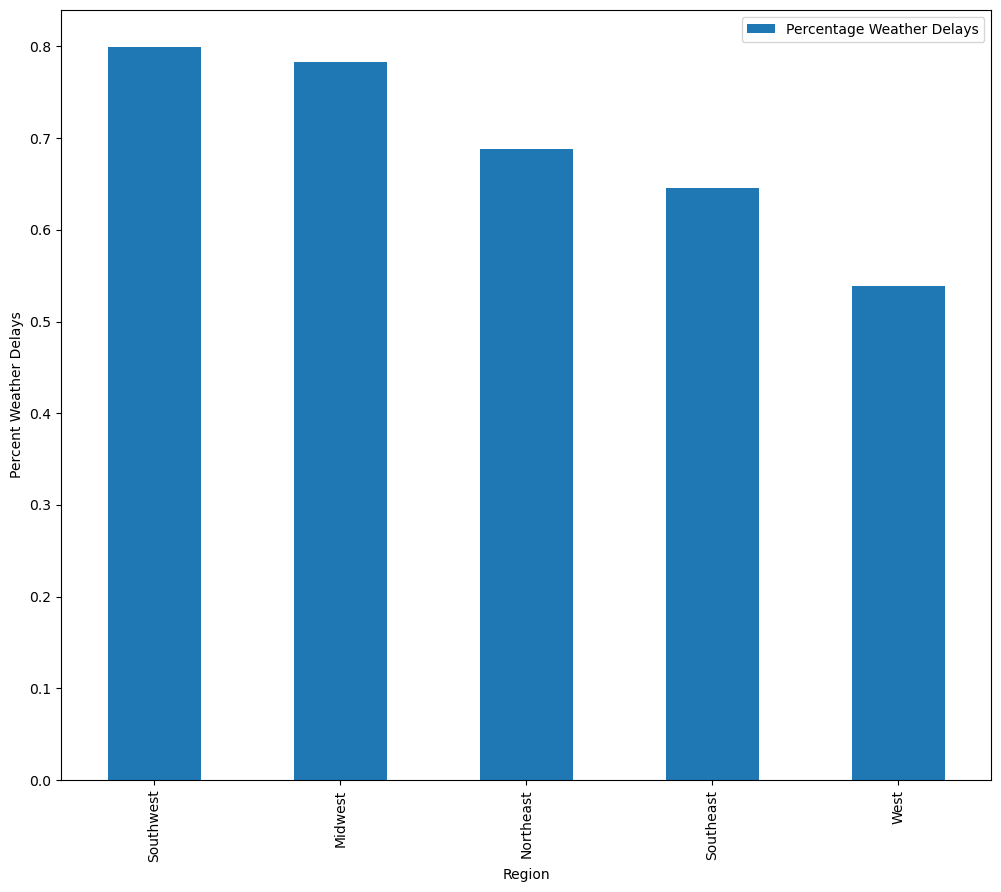

In [24]:
regional_weather_chart = regional_weather_delays.plot.bar()
regional_weather_chart.set_xlabel("Region")
regional_weather_chart.set_ylabel("Percent Weather Delays")
regional_weather_chart.figure.set_size_inches(12, 10)  # Set a larger figure size

plt.savefig('Visuals/delays_weather_region.png')

In [25]:
regions = ['Northeast', 'Southeast', 'Midwest', 'West', 'Southwest']
percentages = [northEast_percent_delay, southEast_percent_delay, midwest_percent_delay, west_percent_delay, southWest_percent_delay]

regional_delays = pd.DataFrame(percentages, index=regions, columns=['Percentage Total Delays'])

regional_delays = regional_delays.sort_values('Percentage Total Delays', ascending=False)
regional_delays

,Percentage Total Delays
Southeast,21.173009
Northeast,20.533379
West,20.136578
Southwest,20.085173
Midwest,19.237769


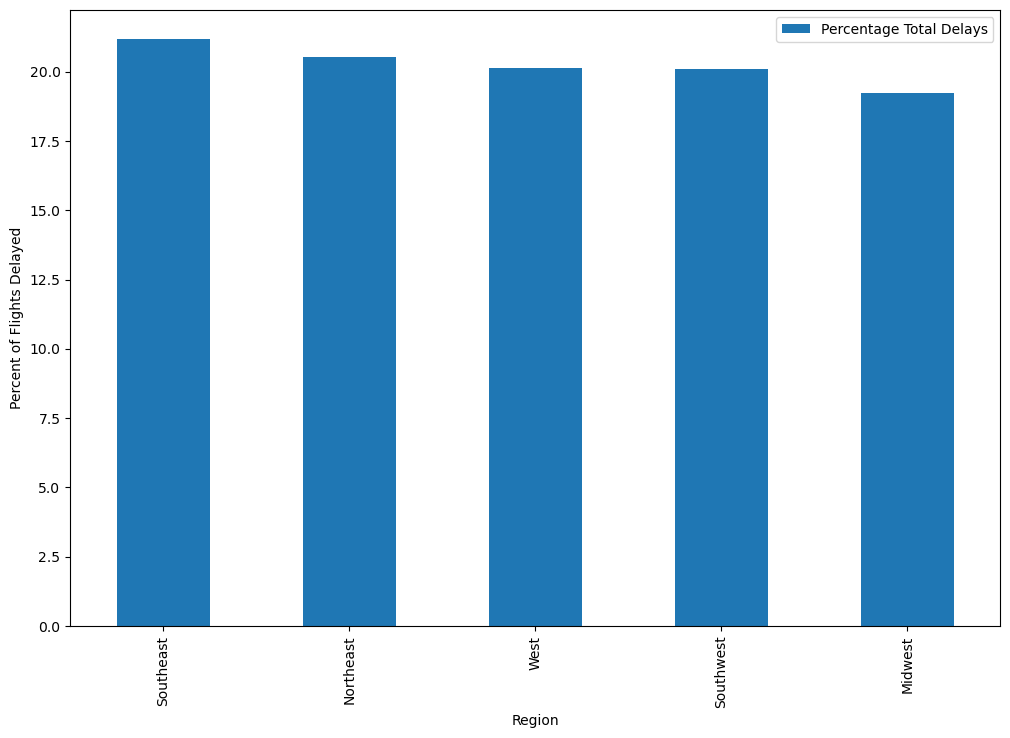

In [27]:
#Regional Delays Chart
regional_chart = regional_delays.plot.bar()
regional_chart.set_xlabel("Region")
regional_chart.set_ylabel("Percent of Flights Delayed")
regional_chart.figure.set_size_inches(12, 8)  # Set a larger figure size
plt.savefig('Visuals/delays_region.png')

# SEASONS

## Season Parameters
The seasons are defined as spring (March, April, May), summer (June, July, August), autumn (September, October, November) and winter (December, January, February).

Source: https://www.metoffice.gov.uk/weather/learn-about/weather/seasons/spring/when-does-spring-start#:~:text=The%20seasons%20are%20defined%20as,December%2C%20January%2C%20February).

In [28]:
#create query for spring dataframe
query = ''' SELECT * FROM flight_data
WHERE month IN ('3','4','5')'''

spring = pd.read_sql(query, engine)

#show dataframe
spring

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,13127,5,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",68.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13128,5,Endeavor Air Inc.,ABY,"Albany, GA",62.0,4.0,2.00,0.91,0.09,0.0,1.00,0.0,0.0,191.0,54.0,51.0,5.0,0.0,81.0
2,13129,5,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,2.0,1.90,0.00,0.00,0.0,0.10,0.0,0.0,245.0,228.0,0.0,0.0,0.0,17.0
3,13130,5,Endeavor Air Inc.,AGS,"Augusta, GA",81.0,5.0,2.27,1.00,1.00,0.0,0.73,0.0,0.0,182.0,105.0,50.0,16.0,0.0,11.0
4,13131,5,Endeavor Air Inc.,ALB,"Albany, NY",212.0,20.0,11.25,0.00,3.26,0.0,5.50,0.0,0.0,1067.0,589.0,0.0,74.0,0.0,404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,18754,3,Air Wisconsin Airlines Corp,SGF,"Springfield, MO",63.0,16.0,6.34,0.00,7.58,0.0,2.08,0.0,0.0,866.0,266.0,0.0,298.0,0.0,302.0
5628,18755,3,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY",9.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5629,18756,3,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK",2.0,1.0,0.88,0.00,0.12,0.0,0.00,0.0,0.0,26.0,23.0,0.0,3.0,0.0,0.0
5630,18757,3,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI",25.0,9.0,3.29,0.71,3.46,0.0,1.54,1.0,0.0,520.0,215.0,25.0,141.0,0.0,139.0


In [29]:
#create query for summer dataframe
query = ''' SELECT * FROM flight_data
WHERE month IN ('6','7','8')'''

summer = pd.read_sql(query, engine)

#show dataframe
summer

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,7505,8,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,7506,8,Endeavor Air Inc.,ABY,"Albany, GA",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,7507,8,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,7508,8,Endeavor Air Inc.,AGS,"Augusta, GA",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,7509,8,Endeavor Air Inc.,ALB,"Albany, NY",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,13122,6,Air Wisconsin Airlines Corp,SGF,"Springfield, MO",31.0,10.0,3.15,0.00,0.44,0.0,6.40,0.0,0.0,596.0,161.0,0.0,34.0,0.0,401.0
5618,13123,6,Air Wisconsin Airlines Corp,SPI,"Springfield, IL",60.0,17.0,5.41,2.10,0.80,0.0,8.69,2.0,1.0,2102.0,209.0,811.0,30.0,0.0,1052.0
5619,13124,6,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY",9.0,3.0,1.25,0.00,1.10,0.0,0.65,0.0,0.0,80.0,32.0,0.0,29.0,0.0,19.0
5620,13125,6,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI",59.0,24.0,6.27,0.75,5.69,0.0,11.29,0.0,0.0,1566.0,338.0,127.0,305.0,0.0,796.0


In [30]:
#create query for fall dataframe
query = ''' SELECT * FROM flight_data
WHERE month IN ('9','10','11')'''

fall = pd.read_sql(query, engine)

#show dataframe
fall

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,1900,11,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",76.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,47.0,47.0,0.0,0.0,0.0,0.0
1,1901,11,Endeavor Air Inc.,ABY,"Albany, GA",6.0,1.0,0.65,0.00,0.35,0.0,0.00,0.0,0.0,52.0,34.0,0.0,18.0,0.0,0.0
2,1902,11,Endeavor Air Inc.,AEX,"Alexandria, LA",59.0,4.0,2.71,1.00,0.29,0.0,0.00,0.0,0.0,157.0,106.0,33.0,18.0,0.0,0.0
3,1903,11,Endeavor Air Inc.,AGS,"Augusta, GA",154.0,4.0,2.00,0.00,2.00,0.0,0.00,0.0,0.0,91.0,51.0,0.0,40.0,0.0,0.0
4,1904,11,Endeavor Air Inc.,ALB,"Albany, NY",45.0,4.0,2.35,0.00,0.00,0.0,1.65,0.0,0.0,92.0,49.0,0.0,0.0,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,7500,9,Air Wisconsin Airlines Corp,SDF,"Louisville, KY",39.0,8.0,2.97,0.76,0.80,0.0,3.47,0.0,0.0,348.0,106.0,16.0,23.0,0.0,203.0
5601,7501,9,Air Wisconsin Airlines Corp,SGF,"Springfield, MO",7.0,2.0,0.80,0.00,0.52,0.0,0.68,0.0,0.0,94.0,20.0,0.0,27.0,0.0,47.0
5602,7502,9,Air Wisconsin Airlines Corp,SPI,"Springfield, IL",51.0,13.0,2.62,0.00,0.20,0.0,10.18,1.0,1.0,871.0,179.0,0.0,15.0,0.0,677.0
5603,7503,9,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI",94.0,27.0,6.51,0.52,7.23,0.0,12.75,1.0,1.0,1528.0,441.0,22.0,217.0,0.0,848.0


In [31]:
#create query for winter dataframe
query = ''' SELECT * FROM flight_data
WHERE month IN ('1','2','12')'''

winter = pd.read_sql(query, engine)

#show dataframe
winter

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,1,12,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2,12,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,3,12,Endeavor Air Inc.,AGS,"Augusta, GA",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,4,12,Endeavor Air Inc.,ALB,"Albany, NY",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,5,12,Endeavor Air Inc.,ATL,"Atlanta, GA",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,22565,1,Air Wisconsin Airlines Corp,STL,"St. Louis, MO",2.0,1.0,0.00,1.00,0.00,0.0,0.00,0.0,0.0,38.0,0.0,38.0,0.0,0.0,0.0
5706,22566,1,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY",31.0,6.0,3.49,0.00,0.67,0.0,1.84,0.0,0.0,1018.0,739.0,0.0,34.0,0.0,245.0
5707,22567,1,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK",27.0,6.0,1.94,0.00,2.24,0.0,1.82,0.0,0.0,204.0,48.0,0.0,51.0,0.0,105.0
5708,22568,1,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI",62.0,17.0,2.65,0.00,4.54,0.0,9.81,4.0,0.0,1485.0,250.0,0.0,287.0,0.0,948.0


In [32]:
# Concatenate the individual DataFrames for seasons
season_df = pd.concat([spring, summer, fall, winter])

# Reset the index to have a clean index for the combined DataFrame
season_df.reset_index(drop=True, inplace=True)

#group by month
season_df_grouped = season_df.groupby(['month']).sum()
season_df_grouped['total_delays_percentage'] = season_df_grouped['total_delays_ct']/season_df_grouped['total_arrivals'] *100
season_df_grouped = season_df_grouped[['total_arrivals','total_delays_ct', 'total_delays_percentage', 'carrier_ct', 'weather_ct', 'nat_air_sys_ct', 'security_ct', 'late_aircraft_ct']]

#sort by highest to lowest % delay and display dataframe 
months_sorted = season_df_grouped.sort_values('total_delays_percentage', ascending=False)
months_sorted

,total_arrivals,total_delays_ct,total_delays_percentage,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct
month,,,,,,,,
7,638994.0,175807.0,27.513091,56554.61,7996.32,41141.75,387.15,69727.12
6,613575.0,160658.0,26.183922,52427.88,6543.12,39553.27,487.01,61647.06
3,616234.0,142566.0,23.135043,45587.59,4036.97,41578.97,419.43,50942.81
4,596676.0,133101.0,22.307081,43916.21,4305.60,35030.23,396.36,49453.05
1,573877.0,124293.0,21.658474,41267.41,4736.02,36479.95,382.79,41426.99
8,640235.0,134883.0,21.067733,45606.59,5162.04,30962.19,471.23,52680.96
2,536228.0,99454.0,18.546961,34841.69,3381.34,27205.40,250.18,33775.30
9,604715.0,110457.0,18.265960,37189.16,3815.01,29790.21,335.44,39327.08
5,616630.0,110487.0,17.917876,39723.97,3344.50,26561.44,351.14,40505.95


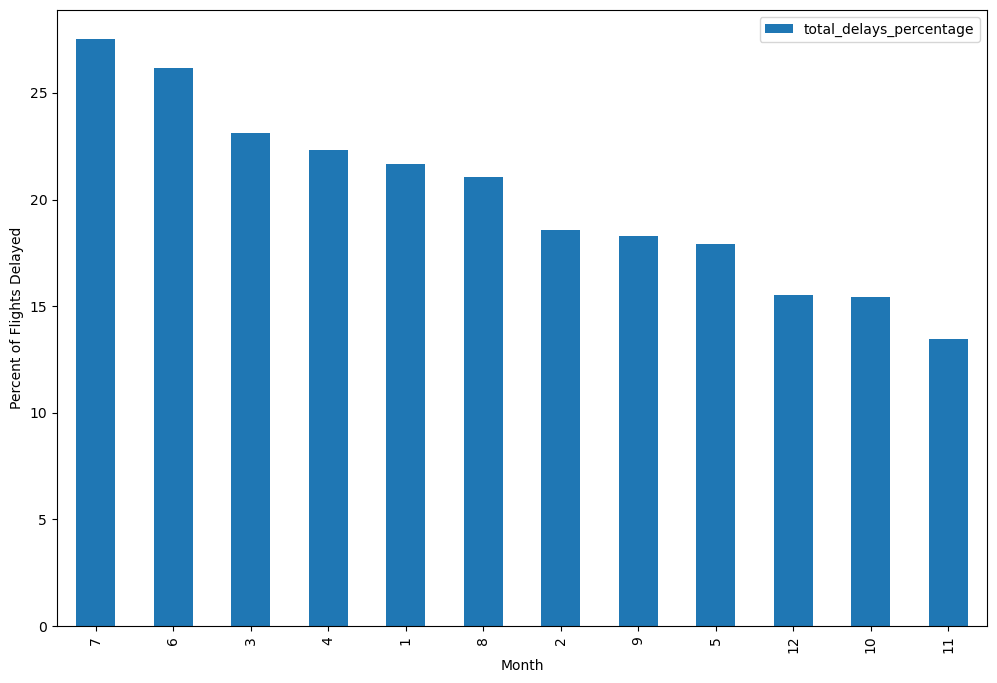

In [34]:
months = months_sorted.reset_index()
month_chart = months.plot.bar(x='month',y='total_delays_percentage')
month_chart.set_xlabel("Month")
month_chart.set_ylabel("Percent of Flights Delayed")
month_chart.figure.set_size_inches(12, 8)  # Set a larger figure size
plt.savefig('Visuals/delays_month.png')

In [35]:
#Seasonal weather delay calculations
fall_total_delay = sum(fall['total_delays_ct'])/sum(fall['total_arrivals']) *100
fall_weather_delay = sum(fall['weather_ct'])/sum(fall['total_delays_ct']) *100

summer_total_delay = sum(summer['total_delays_ct'])/sum(summer['total_arrivals']) *100
summer_weather_delay = sum(summer['weather_ct'])/sum(summer['total_delays_ct']) *100

spring_total_delay = sum(spring['total_delays_ct'])/sum(spring['total_arrivals']) *100
spring_weather_delay = sum(spring['weather_ct'])/sum(spring['total_delays_ct']) *100

winter_total_delay = sum(winter['total_delays_ct'])/sum(winter['total_arrivals']) *100
winter_weather_delay = sum(winter['weather_ct'])/sum(winter['total_delays_ct']) *100

In [36]:
#Seasonal comparison dataframe -- total delays
seasons = ['Spring', 'Fall', 'Summer', 'Winter']
percentages = [spring_total_delay, fall_total_delay, summer_total_delay, winter_total_delay]

seasonal_delays = pd.DataFrame(percentages, index=seasons, columns=['Total Delay Percentage'])
seasonal_delays

,Total Delay Percentage
Spring,21.106617
Fall,15.715243
Summer,24.902103
Winter,18.520174


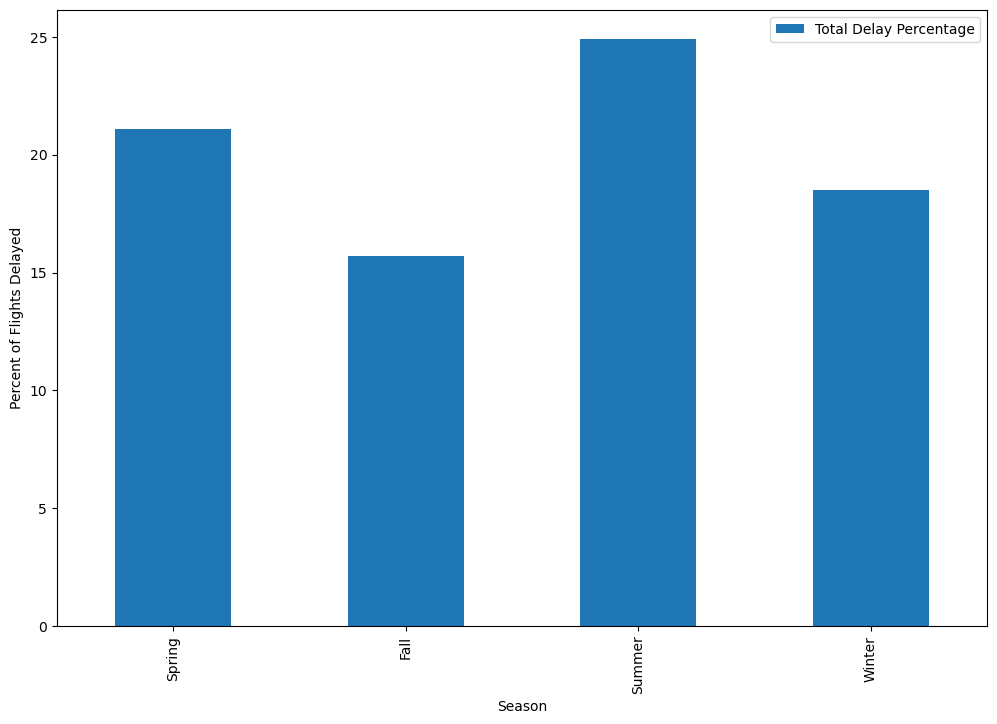

In [37]:
season_chart = seasonal_delays.plot.bar()
season_chart.set_xlabel("Season")
season_chart.set_ylabel("Percent of Flights Delayed")
season_chart.figure.set_size_inches(12, 8)  # Set a larger figure size

plt.savefig('Visuals/delays_season.png')

In [38]:
#Seasonal comparision dataframe -- weather delays
seasons = ['Spring', 'Fall', 'Summer', 'Winter']
percentages = [spring_weather_delay, fall_weather_delay, summer_weather_delay, winter_weather_delay]

seasonal_weather_delays = pd.DataFrame(percentages, index=seasons, columns=['Total Weather Delay Percentage'])
seasonal_weather_delays

,Total Weather Delay Percentage
Spring,3.026531
Fall,2.637007
Summer,4.179816
Winter,3.362423


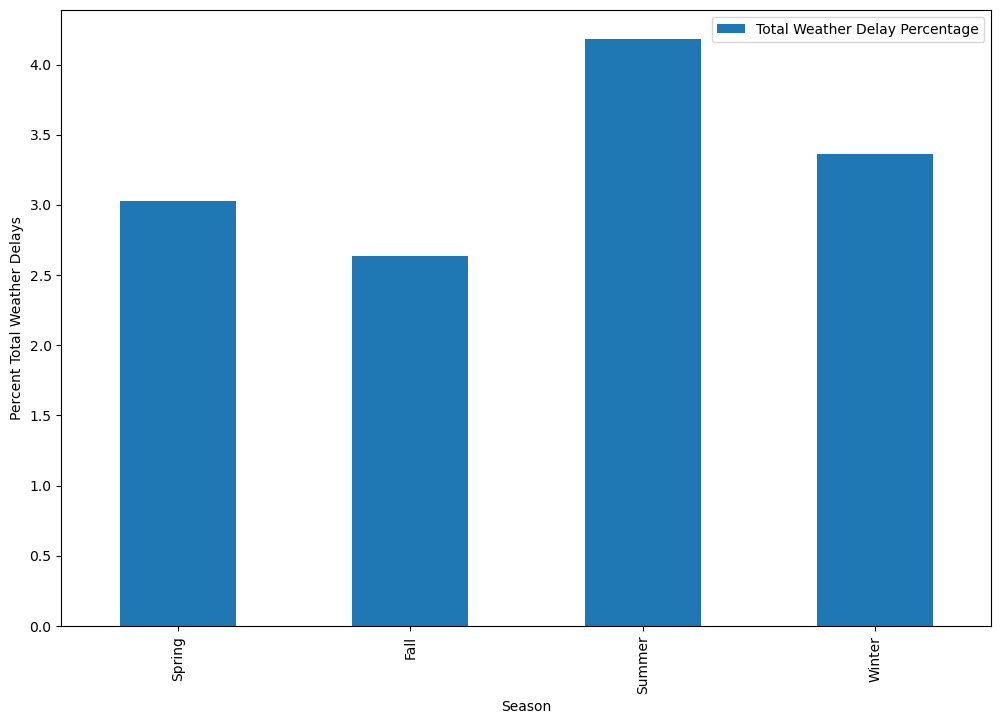

In [39]:
season_weather_chart = seasonal_weather_delays.plot.bar()
season_weather_chart.set_xlabel("Season")
season_weather_chart.set_ylabel("Percent Total Weather Delays")
season_weather_chart.figure.set_size_inches(12, 8)  # Set a larger figure size

plt.savefig('Visuals/delays_weather_season.png')

In [40]:
#create individual city dataframes
seattle = west.loc[west['city'] == 'Seattle, WA', ['airport','Total_Arrivals', 'total_delays', 'weather_delays','month']]
austin = southWest.loc[southWest['city'] == 'Austin, TX', ['airport','Total_Arrivals', 'total_delays','weather_delays', 'month']]
newyork = northEast.loc[northEast['airport'] == 'JFK', ['airport','Total_Arrivals', 'total_delays','weather_delays', 'month']]

austin


,airport,Total_Arrivals,total_delays,weather_delays,month
38,AUS,6808.0,1296.0,29.92,2
103,AUS,7916.0,1831.0,23.34,3
283,AUS,8100.0,2207.0,78.16,7
329,AUS,8191.0,1724.0,44.62,8
427,AUS,7452.0,1649.0,29.99,1
511,AUS,7747.0,1302.0,9.87,12
545,AUS,7786.0,1364.0,7.23,11
667,AUS,7763.0,2199.0,81.84,6
676,AUS,7863.0,1530.0,40.39,9
763,AUS,8397.0,1765.0,17.35,10


In [42]:
# Concatenate the individual DataFrames along the rows
city_df = pd.concat([seattle, austin, newyork])

# Reset the index to have a clean index for the combined DataFrame
city_df.reset_index(drop=True, inplace=True)

# Show the resulting DataFrame
city_df

,airport,Total_Arrivals,total_delays,weather_delays,month
0,SEA,14221.0,2349.0,63.10,4
1,SEA,17421.0,3004.0,119.60,8
2,SEA,15256.0,1904.0,55.91,5
3,SEA,14043.0,1841.0,136.26,12
4,SEA,16483.0,2517.0,75.56,9
5,SEA,14529.0,2007.0,135.71,11
6,SEA,14150.0,2328.0,76.32,3
7,SEA,17113.0,3560.0,138.66,7
8,SEA,16089.0,3092.0,84.57,6
9,SEA,13659.0,2175.0,109.37,1


In [43]:
#Add percentages to dataframe
city_df['delay_perc'] = city_df['total_delays'] / city_df['Total_Arrivals'] * 100
city_df['weather_perc'] = city_df['weather_delays'] / city_df['Total_Arrivals'] * 100
city_df_grouped = city_df.groupby(['airport', 'month']).sum()
city_df_grouped

Total_Arrivals  total_delays  weather_delays  delay_perc  \
airport month                                                             
AUS     1              7452.0        1649.0           29.99   22.128288   
        2              6808.0        1296.0           29.92   19.036428   
        3              7916.0        1831.0           23.34   23.130369   
        4              7591.0        2004.0           38.65   26.399684   
        5              7958.0        1604.0           39.92   20.155818   
        6              7763.0        2199.0           81.84   28.326678   
        7              8100.0        2207.0           78.16   27.246914   
        8              8191.0        1724.0           44.62   21.047491   
        9              7863.0        1530.0           40.39   19.458222   
        10             8397.0        1765.0           17.35   21.019412   
        11             7786.0        1364.0            7.23   17.518623   
        12             7747.0        1302.0            9.87   16.806506   
JFK     1             10912.0        2842.0           53.51   26.044721   
        2             10570.0        2137.0           71.15   20.217597   
        3             12166.0        2931.0           71.33   24.091731   
        4             11636.0        3196.0           93.28   27.466483   
        5             11825.0        2191.0           63.60   18.528541   
        6             11021.0        3144.0          140.18   28.527357   
        7             11187.0        3657.0          194.24   32.689729   
        8             11130.0        2580.0          107.51   23.180593   
        9             10761.0        2717.0          102.34   25.248583   
        10            10913.0        1789.0           32.40   16.393292   
        11            10522.0        1528.0           34.14   14.521954   
        12            10412.0        2040.0           38.73   19.592778   
SEA     1             13659.0        2175.0          109.37   15.923567   
        2             12501.0        2148.0          109.61   17.182625   
        3             14150.0        2328.0           76.32   16.452297   
        4             14221.0        2349.0           63.10   16.517826   
        5             15256.0        1904.0           55.91   12.480336   
        6             16089.0        3092.0           84.57   19.218099   
        7             17113.0        3560.0          138.66   20.802898   
        8             17421.0        3004.0          119.60   17.243557   
        9             16483.0        2517.0           75.56   15.270278   
        10            15733.0        2025.0           69.04   12.871035   
        11            14529.0        2007.0          135.71   13.813752   
        12            14043.0        1841.0          136.26   13.109734   

               weather_perc  
airport month                
AUS     1          0.402442  
        2          0.439483  
        3          0.294846  
        4          0.509156  
        5          0.501634  
        6          1.054232  
        7          0.964938  
        8          0.544744  
        9          0.513672  
        10         0.206621  
        11         0.092859  
        12         0.127404  
JFK     1          0.490378  
        2          0.673132  
        3          0.586306  
        4          0.801650  
        5          0.537844  
        6          1.271935  
        7          1.736301  
        8          0.965948  
        9          0.951027  
        10         0.296894  
        11         0.324463  
        12         0.371975  
SEA     1          0.800717  
        2          0.876810  
        3          0.539364  
        4          0.443710  
        5          0.366479  
        6          0.525639  
        7          0.810261  
        8          0.686528  
        9          0.458412  
        10         0.438823  
        11         0.934063  
        12         0.970305

In [44]:
#Add percentages to dataframe
city_overview = city_df[['airport','Total_Arrivals','total_delays','weather_delays']]
city_overview_grouped = city_overview.groupby(['airport']).sum()
city_overview_grouped['delay_perc'] = city_overview_grouped['total_delays'] / city_overview_grouped['Total_Arrivals'] * 100
city_overview_grouped['weather_perc'] = city_overview_grouped['weather_delays'] / city_overview_grouped['Total_Arrivals'] * 100
city_overview_grouped

city_overview = city_overview_grouped.sort_values('delay_perc', ascending=False)
city_overview

,Total_Arrivals,total_delays,weather_delays,delay_perc,weather_perc
airport,,,,,
JFK,133055.0,30752.0,1002.41,23.112247,0.753380
AUS,93572.0,20475.0,441.28,21.881546,0.471594
SEA,181198.0,28950.0,1173.71,15.976998,0.647750


In [45]:
# The statistical module used to run chi square test
import scipy.stats as stats

In [49]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [47]:
# Run the chi square test with stats.chisquare()
stats.chisquare(city_overview['delay_perc'])

Power_divergenceResult(statistic=1.4316707537328988, pvalue=0.48878362266782704)